# CH02 認識Scikit_Learn套件_資料處理功能

### 資料種類
1. Encoder for Categorical (非數字用label Encodee 轉換成數字) : Nominal(一般數字_ Ordinal(有順序的)
2. Scale 調整Numeric 欄位內容(數字資料調整) interval 間隔  Ratio 數值
3.Data type :
(1)Categorical(非數字資料) : 又區分為:1.Nominal(名稱型) 2.Ordinal(有順序的)
(2)Numerical(數值型資料) : 又區分為:1.Interval(間隔:分級距).Ratio(比例)
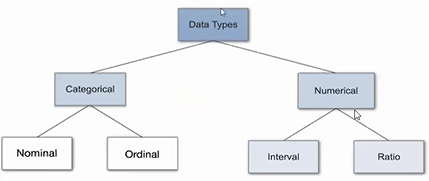
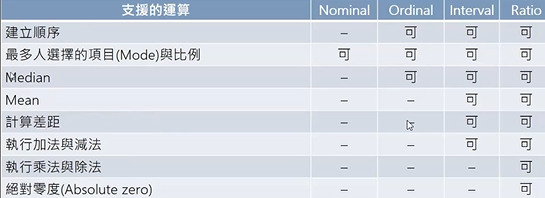
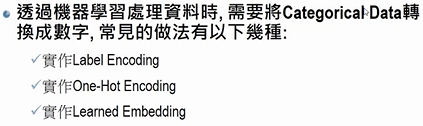
#Learning embeddings for your machine learning model
#https://medium.com/spikelab/learning-embeddings-for-your-machine-learning-model-a6cb4bc6542e
#Categorical Embedding and Transfer Learning
#https://towardsdatascience.com/categorical-embedding-and-transfer-learning-dd3c4af6345d

In [ ]:
#Learning embeddings for your machine learning model
#https://medium.com/spikelab/learning-embeddings-for-your-machine-learning-model-a6cb4bc6542e
#Categorical Embedding and Transfer Learning
#https://towardsdatascience.com/categorical-embedding-and-transfer-learning-dd3c4af6345d
# Categorical(非數字資料) : 又區分為:1.Nominal(名稱型)
# 1.Label Encoding 2. One-Hot Encoding 3. Learned Embrdding

## pandas read excel file，xlrd & xlwt must be installed first : pip install xlrd , pip install xlwt

### 非數值資料(文字欄位) 轉換成數值的做法
<b>1.Label Encoding  2. One-Hot Encoding 3. Ordinal Encoder 4. Learned Embrdding</b><br>
### 1.Label Encoding 
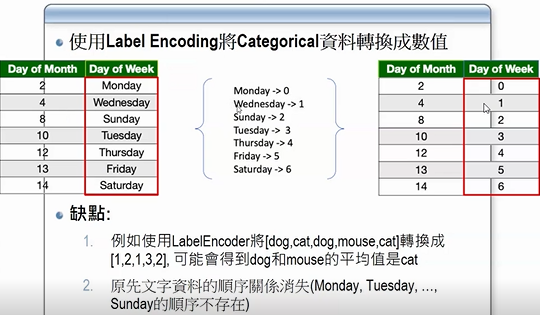

In [ ]:
# 1.Label Encoding ----------------------------------------------------------
import pandas as pd
from sklearn.preprocessing import labelencoder # 一個字對應一個編碼
## pandas read excel file，xlrd & xlwt must be installed first : pip install xlrd , pip install xlwt
df = pd.read_excel(r'datasets\employee.xls') 
display(df)
#labelencoder  : 依據字母排列編碼
le=labelencoder()
df.Gender= le.fit_transform(df.Gender)
display(df)

In [ ]:
# 2.LabelBinarizer (=LabelBinarizer) ----------------------------------------------------
import pandas as pd
from sklearn.preprocessing import LabelEncoder # 一個字對應一個編碼
df = pd.read_excel(r'datasets\employee.xls') 
display(df)

#labelencoder  : 依據字母排列編碼
encoder = LabelBinarizer()  # 只能分0 &1
df.Gender =encoder.fit_transform(df.Gender) 
print(df)

### 2. One Hot Encoding
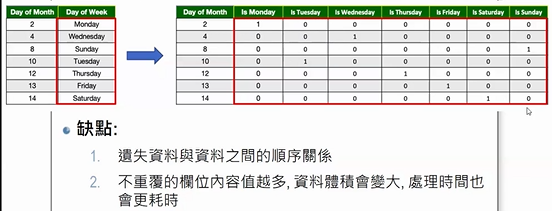

In [ ]:
#3. One-Hot Encoding(1) :  ----------------------------------------------------------------
import pandas as pd
from sklearn.preprocessing import OneHotEncoder # 幾個值就有: 幾個欄位& 幾個列 的編碼
from sklearn.compose import ColumnTransformer

df = pd.read_excel(r'datasets\employee.xls') 
display(df)
# 指定欄位轉換器
encoder =ColumnTransformer(transformers =[('Gender', OneHotEncoder(), ['Gender'])])
onehotgender = encoder.fit_transform(df)
print(f'onehotgender=\n{onehotgender}' )

onehotgender = pd.DataFrame(onehotgender , columns =['Gender_Female', 'intersex','Gender_Male' ])
df = pd.concat([df, onehotgender],axis=1).drop(['Gender'],axis =1)
display(df)

In [ ]:
#4.OneHot Encoder(2) ---------------------------------------------------------------------
import pandas as pd
df=pd.read_excel(r'Datasets\Employee.xls')
display(df)

df1 =df.iloc[:, [0,2]]       # **** 取間隔欄位 用中括號[]
# DataFrame.loc[起始列:結束列, 起始欄:結束欄] #取欄位名稱 *** 包含結束欄
# DataFrame.iloc[起始列:結束列, 起始欄:結束欄] # 取 index *** 不包含結束欄
# DataFrame.loc[起始列:結束列, [欄1, 欄3, 欄5 ]] # 列舉
print('df1 =')
display(df1)
# df2 = df.iloc[:, 2]
# print(f'df2 =\n{df2}')
df3 = pd.get_dummies(df.Gender) # 用 df.Gender  做one hot encoding ，欄位的值變成Column
print(f'df3=')
display(df3)

# df =pd.concat([df1,df2,df3],axis=1)
df =pd.concat([df1,df3],axis=1)
df =df.rename(columns ={'Female':'Gender_Female','Male':'Gender_Male'})
display(df)

In [ ]:
# 5 Ordinal Encoder : 從0開始順序編碼(依字母排列)
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df=pd.read_excel(r'Datasets\Employee.xls')
display(df)
encoder =OrdinalEncoder()
df = encoder.fit_transform(df)
print(df)

In [ ]:
# 補充 : ----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv(r"Datasets\titanic.csv")
display(df.head(), df.shape)
print(f'df.columns = {df.columns}')
plt.hist
columns = ['Pclass', 'Sex', 'Age']
x = df[columns]
print('Feature = \n', x)
y = df.Survived
print("Answer =\n", y)
plt.hist(df.Age)
plt.show()

# 切級距
cut_points = [-1, 1, 5, 12, 18, 35, 60, 100]
label_name = ['Messing', 'Infant', 'Child', 'TeenAger', 'Young Adult', 'Adult', 'Senior']

df.Age =df.Age.fillna(-1)                # 沒有值的填值 -1，另一: dropna
df["AgeRange"] =pd.cut(df.Age, cut_points, labels =label_name)    # 直接給新欄位，加在現有欄位最後
print(df)

df.groupby("AgeRange")['PassengerId'].agg(['count']).plot(kind ='bar') # 'PassengerId'計數用 , agg 匯總技術
plt.show()

### 3. Learned Embedding
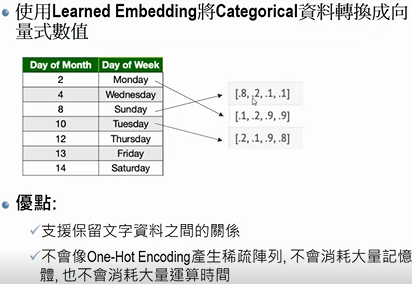

#### Embedding我是把高維度的資料變成低維度，並保留原始資料的特性
1. Motivation From Collaborative Filtering(協同過濾): 同類型電影或廣告的人聚集在一起: 同類型電影或廣告的人聚集在一起<br>
2. Categorical Input Data : (類別型資料)是把input feature一個或多個不連續的項目變成一個集合，這個集合可以像是某個user看過哪些電影、這個文件出現過哪些字之類的。<br>
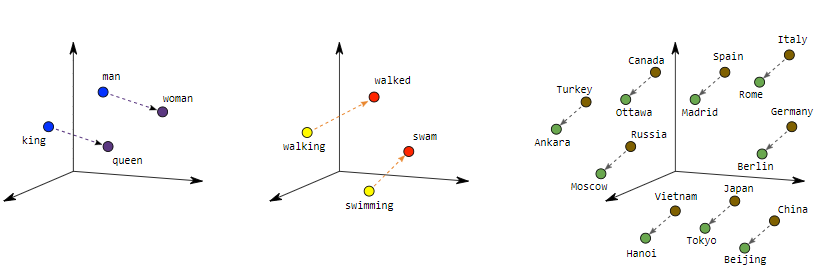
3. 2 problem : <br>

Size of Network: Embedding as lookup table<br>
如果input有M個字、first layer有N個資料，這樣總weight數就是M * N，可以看出來一來資料量大對training model不好、二來M * N個weights要計算也很花時間。<br>縮減Neural network大小
除了要考量embedding space是否足夠讓我們訓練model，還要考量embeding space是否可以保留適當多的原始資訊。<br>

Lack of Meaningful Relations Between Vectors<br>
變成vector還有個問題，語意上雖然可以看出相似程度，但vector卻比較困難，index 1的horse vs. index 134的antelope羚羊 vs. index 30的television，會讓我們混淆到底相似程度如何。<br>
<b>4. Obtaining Embeddings </b><br>
這邊就要講到Embedding矩陣E怎麼來了。有很多常見的演算法，這些演算法都可以套到Machine Learning去進一步學習。像是**主成分分析principal component analysis (PCA)**就可以把高度相關的字詞歸類在一起。<br>

5. Google也發展了一種**Word2Vec演算法，根據分布假說distributional hypothesis**，這個的主要概念是有同樣鄰居的文字應該就有相似的語意<br>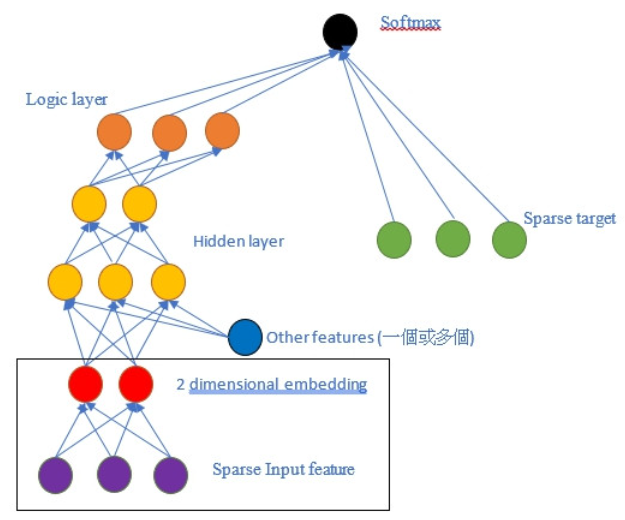

In [ ]:
# learned Embedding  for Pokemon.cvs

# 1.Step1:載入並整理資料 ---------------------------------------------------------------------------------
import numpy as np
import pandas as pd 
df = pd.read_csv(r"Datasets\Pokemon.csv")
print(df.shape)     # (800, 13)
print(df.head())
print(df.columns[:])

df.drop(labels="#", axis=1, inplace=True)                     # drop "#" 欄，inplace=True : df 直接改掉
df.fillna(value="No Type", axis=1, inplace=True)         # 沒有值的填No Type
df.rename({'Type 1': 'type'}, inplace=True, axis=1)     # rename Type 1 to  'type
print(df, df.shape)

n_types = df['type'].nunique()    # 不重複的值有幾個(幾個type: 18 type) 
print("We have:",n_types, "differents pokemons types")    #We have: 18 diferents pokemons types

# 2. Step2: 編碼 type 欄位(LabelEncoder)&處理total 欄位(MinMaxScaler) -----------------------------
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
encoder = LabelEncoder()
scaler = MinMaxScaler()      #調整到一個範圍 : default 0~1 之間

df['encoded_type'] = encoder.fit_transform(df['type']) 
df['scaled_total'] = scaler.fit_transform(df[['Total']])
print(df['encoded_type'] )
print(df['scaled_total'])

types = df['encoded_type']
total = df['scaled_total']

# embedding_size (超參數: 無法經由學習得到: 經驗值 or try in error)
embedding_size = min(np.ceil((n_types)/2),50)           #Jeremy Howard suggest (經驗值)也可以try in error
print(embedding_size)

# Step3.建立Embedding層 ---------------------------------------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential() # 神經層第一層結果給第二層，以此類推
model.add(Embedding(input_dim=n_types,output_dim=int(embedding_size), input_length=1, name="poke_embedding"))
model.add(Flatten())
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer="adam", loss="mse")
model.fit(x=types.values, y=total.values, epochs=30)

embedding_layer = model.get_layer(name="poke_embedding")
embedding_layer = pd.DataFrame(embedding_layer.get_weights()[0])
embedding_layer.columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9']
print(embedding_layer)

# step4. 3D 圖表呈現Embedding 編碼過的寶可夢資料 (依據 type=x, total = y 編碼) ---------------------------------------
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

types_names = list(encoder.inverse_transform([x for x in range(0,n_types)]))
xs = embedding_layer['C1']
ys = embedding_layer['C2']
zs = embedding_layer['C3']
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')
for index, embedding in embedding_layer.iterrows():
    x = embedding['C1']
    y = embedding['C2']
    z = embedding['C3']
    ax.scatter(x, y, z, color='b')
    ax.text(x, y, z, '%s' % (types[index]), size=9, zorder=1, color='k')
#plt.draw()
plt.show()


### 4. 調整Numeric 欄位內容的 Scalar
use Scaler 調整 Numeric 欄位 : 將數值轉換到相同範圍(ex: 0-1之間)https://scikit-learn.org/stable/modules/preprocessing.html
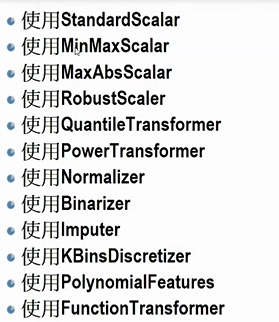

#### (1)1. StandardScaler: 轉換成平均值=0， 標準差 =1
將所有特徵標準化，也就是高斯分佈。使得數據的平均值為0，方差為1。<br>
適合的使用時機於當有些特徵的方差過大時，使用標準化能夠有效地讓模型快速收斂。

In [1]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import scale   # 可以直接用函式不用fit_transform
#StandardScalar : normalize/standardize (mean = 0 and standard deviation = 1) your features/variables/columns of X 
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 1.8]]
print(data)
print("StandardScalar:")
standardscaler = StandardScaler()
transform_data = standardscaler.fit_transform(data)         # transform_data = scale(data)
print(transform_data)

[[-1, 2], [-0.5, 6], [0, 10], [1, 1.8]]
StandardScalar:
[[-1.18321596 -0.87728099]
 [-0.50709255  0.31225256]
 [ 0.16903085  1.5017861 ]
 [ 1.52127766 -0.93675767]]


#### (2) MinMaxScalar : Transform features by scaling each feature to a given range. 
定了一個明確的最大值與最小值。每個特徵中的最小值變成了1，最大值變成了4。數據會縮放到到[1,4]之間。<br>

In [2]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import minmax_scale  # 可以直接用函式不用fit_transform
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
print(data)
print("minmaxscaler:")
minmaxscaler = MinMaxScaler(feature_range=(1, 4))     #預設min:0, max:1
transform_data=minmaxscaler.fit_transform(data)           #transform_data=minmax_scale(data)
print(transform_data)

[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
minmaxscaler:
[[1.   1.  ]
 [1.75 1.75]
 [2.5  2.5 ]
 [4.   4.  ]]


In [4]:
# 補充:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.read_excel(r"Datasets\Employee.xls")
display(df)

minmaxscale = MinMaxScaler()
df[['薪資']] = minmaxscale.fit_transform(df[['薪資']]) # 因MinMaxScaler 只能處理2D array 所以用df[['薪資'] 
print(df)

,姓名,Gender,職務,薪資
0,John,male,Manager,20000
1,Mary,Female,Scale,30000
2,Jack,intersex,Sales Manager,80000


     姓名    Gender             職務        薪資
0  John      male        Manager  0.000000
1  Mary    Female          Scale  0.166667
2  Jack  intersex  Sales Manager  1.000000


#### (3)MaxAbsScalar : Transform features by scaling each feature to -1~1 適合處理稀疏資料
所有數據都會除以該列絕對值後的最大值。 數據會縮放到到[-1,1]之間。

In [5]:
from sklearn.preprocessing import MaxAbsScaler
## from sklearn.preprocessing import maxabs_scale # 可以直接用函式不用fit_transform
data = [[ 1., -1.,  2.], [ 2.,  0.,  0.], [ 0.,  1., -1.]]
display(data)
print("MaxAbsScaler:")
maxabsscaler = MaxAbsScaler()     
transform_data=maxabsscaler.fit_transform(data)           #transform_data=maxabs_scale(data)
print(transform_data)

[[1.0, -1.0, 2.0], [2.0, 0.0, 0.0], [0.0, 1.0, -1.0]]

MaxAbsScaler:
[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]


#### (4)RobustScaler: 適合處理異常資料
中位數和四分位數標準化: 去除中位數(50%)，將異常內容值轉化quantile(分位數)-------------------<br>
Robust Scaling 是將變數值減掉中位數(median)再除以變數的四分位數間距，四分位數間距是第三四分位數(the 3rd quartile or 75th quantile)
減第一四分位數(the 1st quartile or 25th quantile)。這個過程基本上和Min-Max Scaling相似，但它提供了一個較好的範圍給高度偏態分布的資料。
縮放後，每個變數間的變異數、最大值、最小值不一樣，也可能改變原始資料分布的型態，不容易受到異常值影響。

In [6]:
##RobustScaler : Transform Outlier
from sklearn.preprocessing import RobustScaler
import pandas as pd
#from sklearn.preprocessing import robust_scale
data = [[ 1., -2.,  2.], [ -2.,  1.,  3.], [ 20.,  1., -2.]]
# df.describe()
print(data)
dataDataFrame = pd.DataFrame(data)
print(f'dataDataFrame =\n {dataDataFrame}')
print(dataDataFrame.describe())
print("robustscaler:")
robustscaler = RobustScaler()     
transform_data=robustscaler.fit_transform(data)           #transform_data=robust_scale(data)
print(transform_data)

[[1.0, -2.0, 2.0], [-2.0, 1.0, 3.0], [20.0, 1.0, -2.0]]
dataDataFrame =
       0    1    2
0   1.0 -2.0  2.0
1  -2.0  1.0  3.0
2  20.0  1.0 -2.0
               0         1         2
count   3.000000  3.000000  3.000000
mean    6.333333  0.000000  1.000000
std    11.930353  1.732051  2.645751
min    -2.000000 -2.000000 -2.000000
25%    -0.500000 -0.500000  0.000000
50%     1.000000  1.000000  2.000000
75%    10.500000  1.000000  2.500000
max    20.000000  1.000000  3.000000
robustscaler:
[[ 0.         -2.          0.        ]
 [-0.27272727  0.          0.4       ]
 [ 1.72727273  0.         -1.6       ]]


#### (5) QuantileTransformer : 調整全部的值成常態分佈:非线性转换 ================================
QuantileTransformer类将每个特征缩放在同样的范围或分布下。通过执行一个秩转换能够使异常的分布平滑化，
并且能够比缩放更少的收到离群值的影响。但是，它会使特征间及特征内的关联和距离失真。
QuantileTransformer 类以及 quantile_transform 函数提供了一个基于分位数函数的无参数转换，
将数据映射到了零到一的均匀分布上

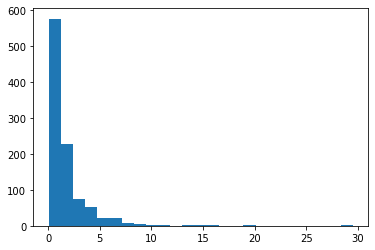

QuantileTransformer:


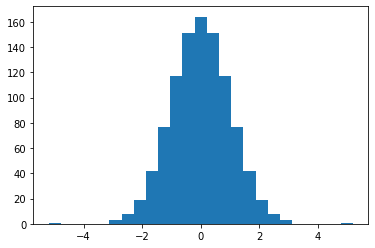

In [8]:
from sklearn.preprocessing import QuantileTransformer
import numpy as np
from  matplotlib  import pyplot 
#from sklearn.preprocessing import quantile_transform
##QuantileTransformer : adjust to normal distribution
data = np.random.randn(1000)
# add a skew to the data distribution
data = np.exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()

## reshape data to have rows and columns
data = data.reshape((len(data),1))
print("QuantileTransformer:")
quantiletransformer = QuantileTransformer(output_distribution='normal')     #'normal' 的常態分佈
transform_data=quantiletransformer.fit_transform(data)           #transform_data=quantile_transform(data, output_distribution='normal')
# histogram of the transformed data
pyplot.hist(transform_data, bins=25)  # bins 是柱數
pyplot.show()

#### (6) PowerTransformer : Box-Cox Transform 支援Yeo-Johnson  轉換 & Box-Cox 轉換

In [13]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
import numpy as np
data = np.random.RandomState(616).lognormal(size=(3, 3)) # 獲取對數正態分布值np.lognormal()方法
# np.lognormal(mean, sigma, size):  ex np.random.lognormal(0.4, 1, 20) 
print(data)

print("1. PowerTransformer:box-cox")
powertransformer = PowerTransformer(method='box-cox', standardize=False)
transform_data=powertransformer.fit_transform(data)         
print(transform_data)

print("2. PowerTransformer:'yeo-johnson'")
pt = PowerTransformer(method='yeo-johnson')
pt_trsnsformer = pt.fit_transform(data)      
print(pt_trsnsformer)

print("3. power_transform'")
transform_data=power_transform(data) # PowerTransformer:'yeo-johnson
print(transform_data)

[[1.28331718 1.18092228 0.84160269]
 [0.94293279 1.60960836 0.3879099 ]
 [1.35235668 0.21715673 1.09977091]]
1. PowerTransformer:box-cox
[[ 0.49024349  0.17881995 -0.1563781 ]
 [-0.05102892  0.58863195 -0.57612414]
 [ 0.69420009 -0.84857822  0.10051454]]
2. PowerTransformer:'yeo-johnson'
[[ 0.33843279  0.21998986  0.13411169]
 [-1.35837468  1.09984115 -1.28628123]
 [ 1.0199419  -1.31983101  1.15216954]]
3. power_transform'
[[ 0.33843279  0.21998986  0.13411169]
 [-1.35837468  1.09984115 -1.28628123]
 [ 1.0199419  -1.31983101  1.15216954]]


#### (7)Normalize : 將資料轉化單位法線向量(Unit  Normal Vector)，常應用在量化資料之間的相似程度
每一列的元素平方後加總=0

In [17]:
from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing import normalize
data = [[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]]
print(data)

print("Normalize:")
normalizer = Normalizer()
transform_data=normalizer.fit_transform(data)       # transform_data=normalize(data)
print(transform_data)  #結果每一列元素後加總的值=1

[[1.0, -1.0, 2.0], [2.0, 0.0, 0.0], [0.0, 1.0, -1.0]]
Normalize:
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


#### (8)Binarization : greater than 0=1, less than 0=0 (二值化)========================

In [19]:
from sklearn.preprocessing import Binarizer
#from sklearn.preprocessing import binarize
data = [[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]]  
print(data)
print("Binarizer:")
binarizer=Binarizer(threshold=1)
transform_data=binarizer.fit_transform(data)        # transform_data=binarize(data)
print(transform_data)

[[1.0, -1.0, 2.0], [2.0, 0.0, 0.0], [0.0, 1.0, -1.0]]
Binarizer:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]]


#### (9)Imputer 以指定方式(例如平均值)填入值到無資料的內容 =======================================

In [20]:
# from sklearn.preprocessing import Imputer       #old
# 將 np.nan 值的欄位填入平均值
from sklearn.impute import SimpleImputer       #new     ps:  impute[ɪmˋpjut] 估算,歸於
import numpy as np
## Imputer : fill missing data
data= [[1, 2], [np.nan, 3], [7, 6]]
print(data)

print("Imputer:")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  
# strategy='mean', strategy='median',  眾數插補: strategy='most_frequent'
transform_data=imputer.fit_transform(data)   
print(transform_data)

[[1, 2], [nan, 3], [7, 6]]
Imputer:
[[1. 2.]
 [4. 3.]
 [7. 6.]]


#### (10)KBinsDiscretizer : Transform continous data to discrete data =================

In [21]:
from sklearn.preprocessing import KBinsDiscretizer 
data = [[ -3., 5., 15 ],
        [  0., 6., 14 ],
        [  6., 3., 11 ]]
print(data)
print("KBinsDiscretizer:")
# n_bins=[3, 2, 2] :  3 是第1欄切3段(三個值),2是第2欄切2段(2個值),....
# encode='ordinal' 順序從0開始
kbinsdiscretizer = KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal') # encode='onehot', 'ordinal'
transform_data=kbinsdiscretizer.fit_transform(data)   
print(transform_data)

[[-3.0, 5.0, 15], [0.0, 6.0, 14], [6.0, 3.0, 11]]
KBinsDiscretizer:
[[0. 1. 1.]
 [1. 1. 1.]
 [2. 0. 0.]]


#### Feature Creation (11) PolynomialFeatures 多項式 : 產生非線性資料(擴充Feature)================
多項式擴充，原來只有X和Y變數，現在增加了XX、YY、XY和bias。

In [22]:
## PolynomialFeatures  : generate polynomial(non-linear) data
from  sklearn.preprocessing import PolynomialFeatures
import numpy as np
data = np.arange(6).reshape(3, 2)
print(data)
print("PolynomialFeatures:")
polynomialfeatures = PolynomialFeatures(2)
transform_data=polynomialfeatures.fit_transform(data)   
print(transform_data)

[[0 1]
 [2 3]
 [4 5]]
PolynomialFeatures:
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


#### Scale 是轉換器 (12)FunctionTransformer 自訂轉換公式(可以運用在Sklearn 的Pipeline 運算中)
Pipeline : 第一條生產線的輸出結果，是第二條生產線的輸入，以此類推

In [25]:
## Importing the training dataset
#raw_train = pd.read_csv(r'Datasets\titanic.csv')

data = [[0, 1], [2, 3]]
print(data)
print("FunctionTransformer:")
functionaltransformer = FunctionTransformer(np.log1p, validate=True)
transform_data=functionaltransformer.fit_transform(data)
print(transform_data)


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[[0, 1], [2, 3]]
FunctionTransformer:
[[0.         0.69314718]
 [1.09861229 1.38629436]]


In [27]:
## Creating a function to appropriately engineer the ‘Age’ column
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

def create_age_bins(col):
   """Engineers age bin variables for pipeline"""
 
   # Defining / instantiating the necessary variables
   age_bins = [-1, 12, 18, 25, 50, 100]
   age_labels = ['child', 'teen', 'young_adult', 'adult', 'elder']
   age_imputer = SimpleImputer(strategy = 'median')
   age_ohe = OneHotEncoder()
 
   # Performing basic imputation for nulls
   imputed = age_imputer.fit_transform(col)
   ages_filled = pd.DataFrame(data = imputed, columns = ['Age'])
 
   # Segregating ages into age bins
   age_cat_cols = pd.cut(ages_filled['Age'], bins = age_bins, labels = age_labels)
   age_cats = pd.DataFrame(data = age_cat_cols, columns = ['Age'])
 
   # One hot encoding new age bins
   ages_encoded = age_ohe.fit_transform(age_cats[['Age']])
   ages_encoded = pd.DataFrame(data = ages_encoded.toarray()) 
   return ages_encoded

# Creating function to appropriately engineer the ‘Embarked’ column
def create_embarked_columns(col):
   """Engineers the embarked variables for pipeline"""
 
   # Instantiating the transformer objects
   embarked_imputer = SimpleImputer(strategy = 'most_frequent') # 文字 : 最常見
   embarked_ohe = OneHotEncoder()
 
   # Performing basic imputation for nulls
   imputed = embarked_imputer.fit_transform(col)
   embarked_filled = pd.DataFrame(data = imputed, columns = ['Embarked'])
 
   # Performing OHE on the col data
   embarked_columns = embarked_ohe.fit_transform(embarked_filled[['Embarked']])
   embarked_columns_df = pd.DataFrame(data = embarked_columns.toarray()) 
   return embarked_columns_df


## Importing the training dataset
raw_train = pd.read_csv(r'Datasets\titanic.csv')

## Splitting the training data into appropriate training and validation sets
X = raw_train.drop(columns = ['Survived'])
y = raw_train[['Survived']]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

## Creating a preprocessor to transform the 'Sex', 'Age' and 'Embarked' column
data_preprocessor = ColumnTransformer(transformers = [
   ('sex_transformer', OneHotEncoder(), ['Sex']),
   ('age_transformer', FunctionTransformer(create_age_bins, validate = False), ['Age']),
   ('embarked_transformer', FunctionTransformer(create_embarked_columns, validate = False), ['Embarked'])
])

## Creating our pipeline that first preprocesses the data, then scales the data, then fits the data to a RandomForestClassifier
rfc_pipeline = Pipeline(steps = [
   ('data_preprocessing', data_preprocessor),
   ('data_scaling', StandardScaler()),
  # ('model', RandomForestClassifier(max_depth = 10,
  #                                  min_samples_leaf = 3,
  ##                                  min_samples_split = 4,
  #                                  n_estimators = 200))
])

## Fitting the training data to our pipeline
transform_data=rfc_pipeline.fit_transform(X_train, y_train)
print(transform_data)

## Fitting the training data to our pipeline
rfc_pipeline.fit(X_train, y_train)

[[-0.72224656  0.72224656  0.84168872 ... -0.46080495 -0.30835364
   0.59579323]
 [-0.72224656  0.72224656 -1.18808768 ... -0.46080495 -0.30835364
   0.59579323]
 [ 1.38456873 -1.38456873 -1.18808768 ... -0.46080495 -0.30835364
   0.59579323]
 ...
 [-0.72224656  0.72224656  0.84168872 ... -0.46080495 -0.30835364
   0.59579323]
 [ 1.38456873 -1.38456873 -1.18808768 ... -0.46080495 -0.30835364
   0.59579323]
 [-0.72224656  0.72224656 -1.18808768 ... -0.46080495 -0.30835364
   0.59579323]]


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('sex_transformer',
                                                  OneHotEncoder(), ['Sex']),
                                                 ('age_transformer',
                                                  FunctionTransformer(func=<function create_age_bins at 0x000002A36965CB80>),
                                                  ['Age']),
                                                 ('embarked_transformer',
                                                  FunctionTransformer(func=<function create_embarked_columns at 0x000002A36965CAF0>),
                                                  ['Embarked'])])),
                ('data_scaling', StandardScaler())])